In [1]:
# to handle datasets
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# for the yeo-johnson transformation
import scipy.stats as stats
import os
# to display all the columns of the dataframe in the notebook
pd.pandas.set_option('display.max_columns', None)

# Data Analysis

Let's go ahead and load the dataset.

In [56]:
# load dataset
data = pd.read_csv('../data/raw/dls/train.csv')

# rows and columns of the data
print(data.shape)

# visualise the dataset
data.head()

(5282, 20)


ClientPeriod  MonthlySpending TotalSpent     Sex  IsSeniorCitizen  \
0            55            19.50    1026.35    Male                0   
1            72            25.85     1872.2    Male                0   
2             1            75.90       75.9    Male                0   
3            32            79.30       2570  Female                1   
4            60           115.25    6758.45  Female                0   

  HasPartner HasChild HasPhoneService HasMultiplePhoneNumbers  \
0        Yes      Yes             Yes                      No   
1        Yes       No             Yes                     Yes   
2         No       No             Yes                      No   
3        Yes       No             Yes                     Yes   
4        Yes      Yes             Yes                     Yes   

  HasInternetService HasOnlineSecurityService      HasOnlineBackup  \
0                 No      No internet service  No internet service   
1                 No      No internet service  No internet service   
2        Fiber optic                       No                   No   
3        Fiber optic                       No                   No   
4        Fiber optic                      Yes                  Yes   

   HasDeviceProtection HasTechSupportAccess          HasOnlineTV  \
0  No internet service  No internet service  No internet service   
1  No internet service  No internet service  No internet service   
2                   No                  Yes                   No   
3                  Yes                   No                   No   
4                  Yes                  Yes                  Yes   

  HasMovieSubscription HasContractPhone IsBillingPaperless  \
0  No internet service         One year                 No   
1  No internet service         Two year                 No   
2                   No   Month-to-month                Yes   
3                   No   Month-to-month                 No   
4                  Yes         Two year                 No   

             PaymentMethod  Churn  
0             Mailed check      0  
1  Credit card (automatic)      0  
2         Electronic check      1  
3             Mailed check      0  
4  Credit card (automatic)      0

In [57]:
data = data.replace('No internet service', np.nan)
data = data.replace('No phone service', np.nan)

In [38]:
# load dataset
data2 = pd.read_excel('../data/raw/kgl/Telco_customer_churn.xlsx')

# rows and columns of the data
print(data2.shape)

# visualise the dataset
data2.head()

(7043, 33)


CustomerID  Count        Country       State         City  Zip Code  \
0  3668-QPYBK      1  United States  California  Los Angeles     90003   
1  9237-HQITU      1  United States  California  Los Angeles     90005   
2  9305-CDSKC      1  United States  California  Los Angeles     90006   
3  7892-POOKP      1  United States  California  Los Angeles     90010   
4  0280-XJGEX      1  United States  California  Los Angeles     90015   

                 Lat Long   Latitude   Longitude  Gender Senior Citizen  \
0  33.964131, -118.272783  33.964131 -118.272783    Male             No   
1   34.059281, -118.30742  34.059281 -118.307420  Female             No   
2  34.048013, -118.293953  34.048013 -118.293953  Female             No   
3  34.062125, -118.315709  34.062125 -118.315709  Female             No   
4  34.039224, -118.266293  34.039224 -118.266293    Male             No   

  Partner Dependents  Tenure Months Phone Service Multiple Lines  \
0      No         No              2           Yes             No   
1      No        Yes              2           Yes             No   
2      No        Yes              8           Yes            Yes   
3     Yes        Yes             28           Yes            Yes   
4      No        Yes             49           Yes            Yes   

  Internet Service Online Security Online Backup Device Protection  \
0              DSL             Yes           Yes                No   
1      Fiber optic              No            No                No   
2      Fiber optic              No            No               Yes   
3      Fiber optic              No            No               Yes   
4      Fiber optic              No           Yes               Yes   

  Tech Support Streaming TV Streaming Movies        Contract  \
0           No           No               No  Month-to-month   
1           No           No               No  Month-to-month   
2           No          Yes              Yes  Month-to-month   
3          Yes          Yes              Yes  Month-to-month   
4           No          Yes              Yes  Month-to-month   

  Paperless Billing             Payment Method  Monthly Charges Total Charges  \
0               Yes               Mailed check            53.85        108.15   
1               Yes           Electronic check            70.70        151.65   
2               Yes           Electronic check            99.65         820.5   
3               Yes           Electronic check           104.80       3046.05   
4               Yes  Bank transfer (automatic)           103.70        5036.3   

  Churn Label  Churn Value  Churn Score  CLTV                   Churn Reason  
0         Yes            1           86  3239   Competitor made better offer  
1         Yes            1           67  2701                          Moved  
2         Yes            1           86  5372                          Moved  
3         Yes            1           84  5003                          Moved  
4         Yes            1           89  5340  Competitor had better devices

In [39]:
data2.isna().mean()

CustomerID           0.00000
Count                0.00000
Country              0.00000
State                0.00000
City                 0.00000
Zip Code             0.00000
Lat Long             0.00000
Latitude             0.00000
Longitude            0.00000
Gender               0.00000
Senior Citizen       0.00000
Partner              0.00000
Dependents           0.00000
Tenure Months        0.00000
Phone Service        0.00000
Multiple Lines       0.00000
Internet Service     0.00000
Online Security      0.00000
Online Backup        0.00000
Device Protection    0.00000
Tech Support         0.00000
Streaming TV         0.00000
Streaming Movies     0.00000
Contract             0.00000
Paperless Billing    0.00000
Payment Method       0.00000
Monthly Charges      0.00000
Total Charges        0.00000
Churn Label          0.00000
Churn Value          0.00000
Churn Score          0.00000
CLTV                 0.00000
Churn Reason         0.73463
dtype: float64

# Target

In [58]:

target = 'Churn'
data['Churn'].value_counts()

0    3898
1    1384
Name: Churn, dtype: int64

## Variable Types

Next, let's identify the categorical and numerical variables

In [59]:
binary_vars = ['Sex', 'HasPartner', 'HasChild','HasPhoneService','IsBillingPaperless'] + ['HasMultiplePhoneNumbers','HasInternetService','HasOnlineSecurityService','HasOnlineBackup',
'HasDeviceProtection','HasTechSupportAccess','HasOnlineTV','HasMovieSubscription',
]



In [60]:
# sex_mapping = {'Male':1,
#               'Female':0}
# yes_no_mapping = {'Yes':1,
#                  'No':0}

# data['Sex'] = data['Sex'].map(sex_mapping)
# for col in binary_vars[1:]:
#     data[col] = data[col].map(yes_no_mapping)


In [61]:
# # let's identify the categorical variables
# # we will capture those of type *object*

# cat_vars = [var for var in data.columns 
#             if data[var].dtype == 'O' and var not in ['TotalSpent']]

# # MSSubClass is also categorical by definition, despite its numeric values
# # (you can find the definitions of the variables in the data_description.txt
# # file available on Kaggle, in the same website where you downloaded the data)


# cat_vars = cat_vars 

# # number of categorical variables
# len(cat_vars)

In [62]:
data['IsSeniorCitizen'] = data['IsSeniorCitizen'].map({1:'Yes',
                                                      0:'No'})
data['TotalSpent'] = pd.to_numeric(data['TotalSpent'], errors = 'coerce')

In [63]:
vars_num = list(data.select_dtypes(include = np.number).columns)# fill your code here
vars_num.remove(target)


vars_cat = list(data.select_dtypes(exclude = np.number).columns)# fill your code here


print('Number of numerical variables: {}'.format(len(vars_num)))
print('Number of categorical variables: {}'.format(len(vars_cat)))

Number of numerical variables: 3
Number of categorical variables: 16


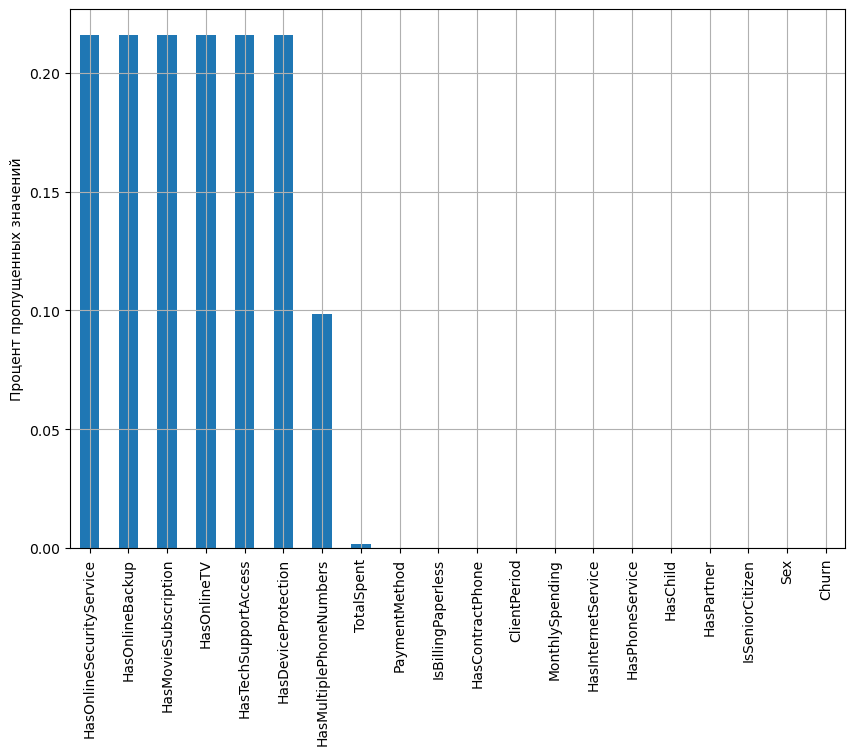

In [77]:
data.isna().mean().sort_values(ascending = False).plot.bar(figsize = (10,7), grid = True)
plt.ylabel('Процент пропущенных значений')

plt.show()

In [65]:
# first in numerical variables
vars_with_na_num = [col for col in vars_num if data[col].isnull().sum() >0]
print(f'Из {len(vars_num)} числовых, числовые с пропущенными {len(vars_with_na_num)}')

Из 3 числовых, числовые с пропущенными 1


In [66]:
# now in categorical variables
vars_with_na_cat = [col for col in vars_cat if data[col].isnull().sum() >0]
print(f'Из {len(vars_cat)} категориальных, категориальные с пропущенными {len(vars_with_na_cat)}')

Из 16 категориальных, категориальные с пропущенными 7


In [67]:
def na_var_and_target(df, var):
    
    test = df.copy()
    test[var] = np.where(test[var].isnull(),1,0)
    test.groupby(var)[target].agg(['mean','std']).plot(kind = 'barh', y = 'mean',xerr ='std')
    plt.show()

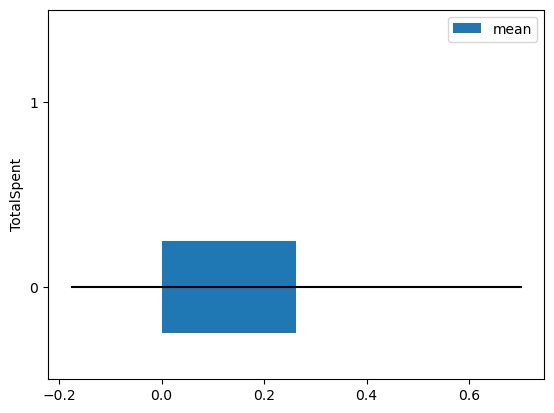

In [68]:
for var in vars_with_na_num:
    na_var_and_target(data, var)

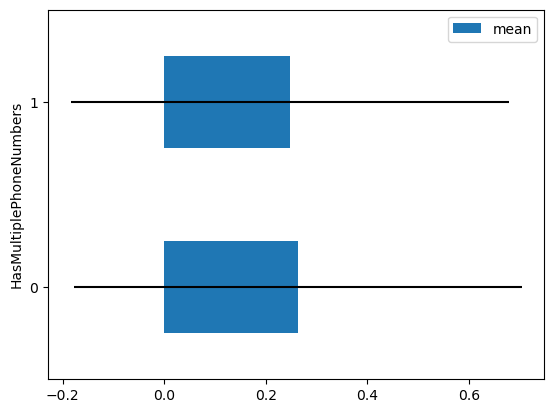

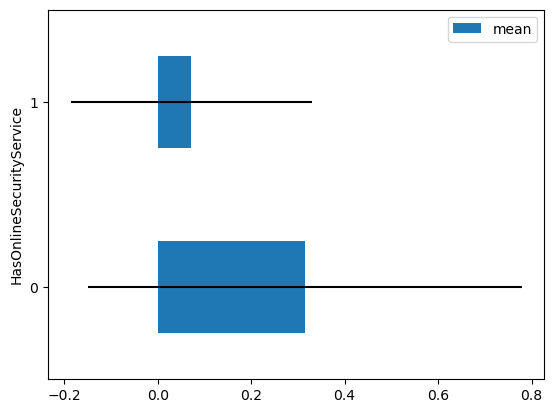

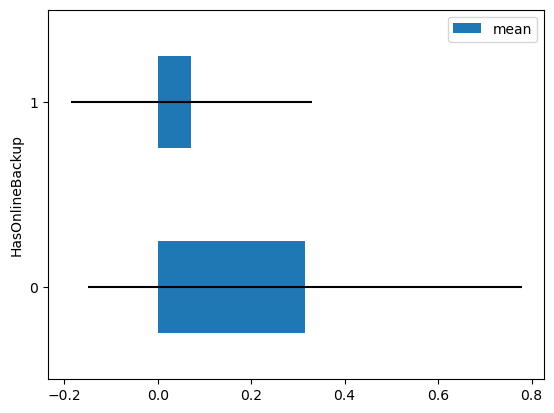

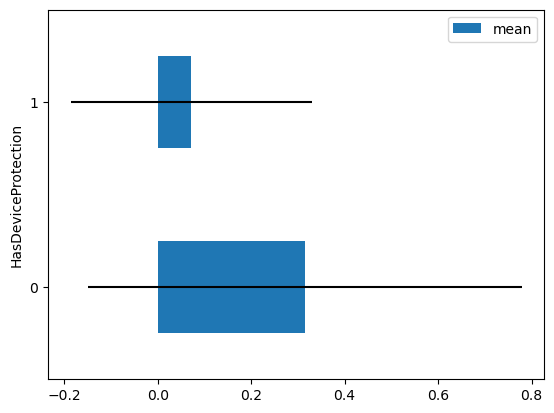

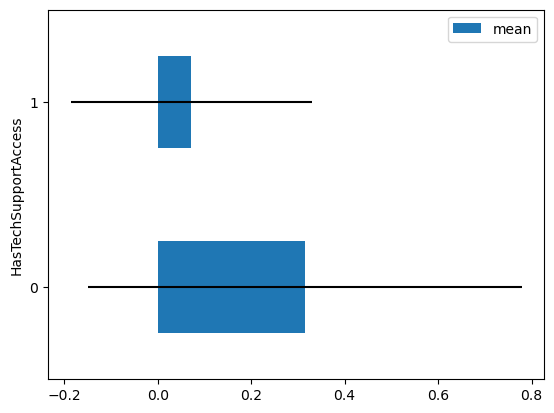

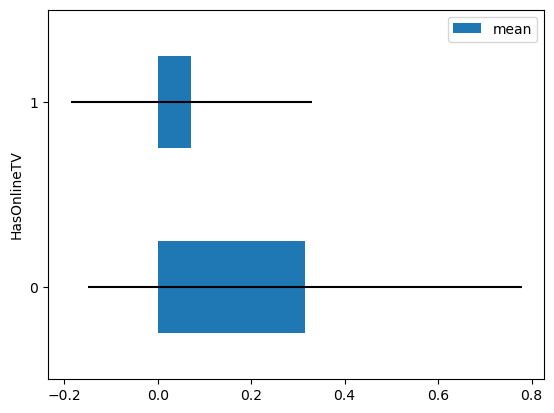

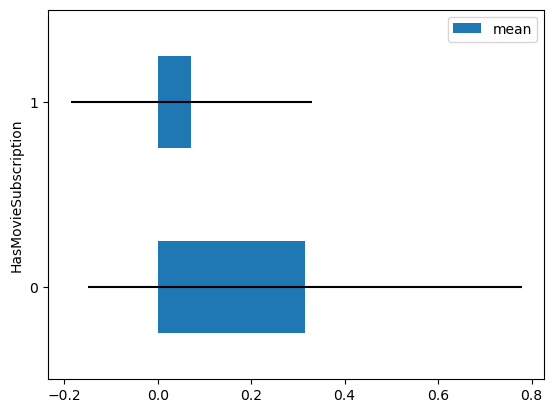

In [78]:
for var in vars_with_na_cat:
    na_var_and_target(data, var)

<Axes: >

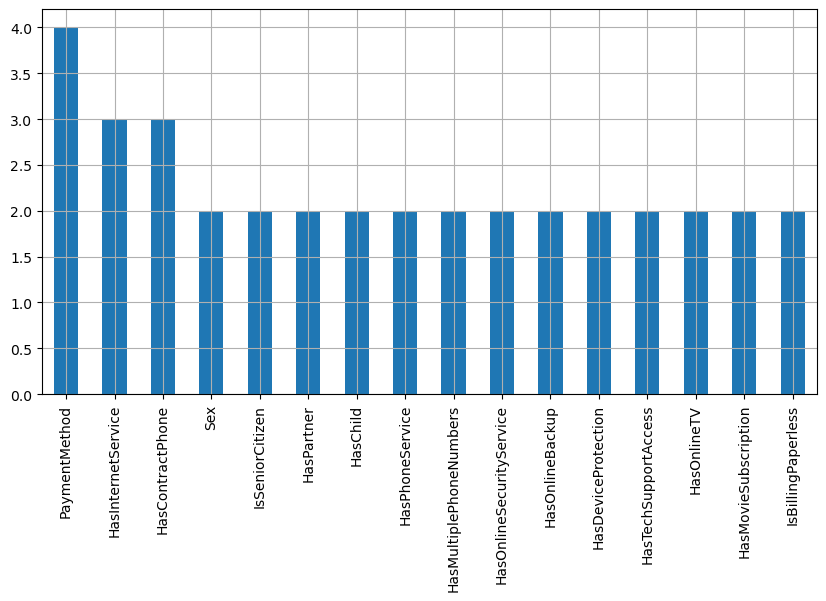

In [79]:
data[vars_cat].nunique().sort_values(ascending = False).plot.bar(figsize = (10,5), grid = True)

In [80]:
descrite_vars = [col for col in vars_num if data[col].nunique() < 20]
data[descrite_vars].head(2)

Empty DataFrame
Columns: []
Index: [0, 1]

In [82]:
import seaborn as sns
for var in descrite_vars:
    data.groupby(var)[target].agg(['mean','std']).plot(kind = 'barh', y = 'mean',xerr ='std')
    plt.show()

In [83]:
# cast all variables as categorical
data[cat_vars] = data[cat_vars].astype('O')

In [84]:
# now let's identify the numerical variables

num_vars = [
    var for var in data.columns if var not in cat_vars and var != 'Churn'
]

# number of numerical variables
len(num_vars)

9

In [85]:
data[num_vars]

ClientPeriod  MonthlySpending TotalSpent  Sex  IsSeniorCitizen  \
0               55            19.50    1026.35    1                0   
1               72            25.85     1872.2    1                0   
2                1            75.90       75.9    1                0   
3               32            79.30       2570    0                1   
4               60           115.25    6758.45    0                0   
...            ...              ...        ...  ...              ...   
5277             3            30.40      82.15    1                0   
5278            50            44.45    2188.45    1                0   
5279             1            55.05      55.05    1                0   
5280            29            76.00    2215.25    0                0   
5281            19            75.90     1375.6    0                0   

      HasPartner  HasChild  HasPhoneService  IsBillingPaperless  
0              1         1                1                   0  
1              1         0                1                   0  
2              0         0                1                   1  
3              1         0                1                   0  
4              1         1                1                   0  
...          ...       ...              ...                 ...  
5277           0         0                0                   0  
5278           1         0                0                   1  
5279           0         0                1                   0  
5280           0         0                1                   1  
5281           0         1                1                   1  

[5282 rows x 9 columns]

# Missing values

Let's go ahead and find out which variables of the dataset contain missing values.

In [86]:
# make a list of the variables that contain missing values
vars_with_na = [var for var in data.columns if data[var].isnull().sum() > 0]

# determine percentage of missing values (expressed as decimals)
# and display the result ordered by % of missin data

data[vars_with_na].isnull().mean().sort_values(ascending=False)

Series([], dtype: float64)

# Categorical variables

Let's go ahead and analyse the categorical variables present in the dataset.

In [87]:
print('Number of categorical variables: ', len(cat_vars))

Number of categorical variables:  10


In [88]:
# let's visualise the values of the categorical variables
data[cat_vars].head()

HasMultiplePhoneNumbers HasInternetService HasOnlineSecurityService  \
0                      No                 No      No internet service   
1                     Yes                 No      No internet service   
2                      No        Fiber optic                       No   
3                     Yes        Fiber optic                       No   
4                     Yes        Fiber optic                      Yes   

       HasOnlineBackup  HasDeviceProtection HasTechSupportAccess  \
0  No internet service  No internet service  No internet service   
1  No internet service  No internet service  No internet service   
2                   No                   No                  Yes   
3                   No                  Yes                   No   
4                  Yes                  Yes                  Yes   

           HasOnlineTV HasMovieSubscription HasContractPhone  \
0  No internet service  No internet service         One year   
1  No internet service  No internet service         Two year   
2                   No                   No   Month-to-month   
3                   No                   No   Month-to-month   
4                  Yes                  Yes         Two year   

             PaymentMethod  
0             Mailed check  
1  Credit card (automatic)  
2         Electronic check  
3             Mailed check  
4  Credit card (automatic)

In [92]:
import numpy as np

In [96]:
data.replace('No internet service',np.nan).isna().mean()

ClientPeriod                0.000000
MonthlySpending             0.000000
TotalSpent                  0.000000
Sex                         0.000000
IsSeniorCitizen             0.000000
HasPartner                  0.000000
HasChild                    0.000000
HasPhoneService             0.000000
HasMultiplePhoneNumbers     0.000000
HasInternetService          0.000000
HasOnlineSecurityService    0.216017
HasOnlineBackup             0.216017
HasDeviceProtection         0.216017
HasTechSupportAccess        0.216017
HasOnlineTV                 0.216017
HasMovieSubscription        0.216017
HasContractPhone            0.000000
IsBillingPaperless          0.000000
PaymentMethod               0.000000
Churn                       0.000000
dtype: float64

In [97]:
nan_Df = data.replace('No internet service',np.nan)

In [100]:
nan_Df[nan_Df.isna().any(1)]

C:\Users\Pavel\AppData\Local\Temp\ipykernel_17384\4041647299.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  nan_Df[nan_Df.isna().any(1)]


ClientPeriod  MonthlySpending TotalSpent  Sex  IsSeniorCitizen  \
0               55            19.50    1026.35    1                0   
1               72            25.85     1872.2    1                0   
5               25            19.80      475.2    0                0   
18              59            19.85    1188.25    1                0   
22              20            19.50        413    0                0   
...            ...              ...        ...  ...              ...   
5255            54            20.50     1035.7    0                0   
5257             1            19.20       19.2    1                0   
5259            47            24.55    1160.45    1                0   
5269            13            20.45      254.5    0                0   
5275            21            19.95      416.4    1                0   

      HasPartner  HasChild  HasPhoneService HasMultiplePhoneNumbers  \
0              1         1                1                      No   
1              1         0                1                     Yes   
5              0         0                1                      No   
18             1         1                1                      No   
22             0         0                1                      No   
...          ...       ...              ...                     ...   
5255           0         0                1                      No   
5257           1         1                1                      No   
5259           1         1                1                     Yes   
5269           1         1                1                      No   
5275           0         0                1                      No   

     HasInternetService HasOnlineSecurityService HasOnlineBackup  \
0                    No                      NaN             NaN   
1                    No                      NaN             NaN   
5                    No                      NaN             NaN   
18                   No                      NaN             NaN   
22                   No                      NaN             NaN   
...                 ...                      ...             ...   
5255                 No                      NaN             NaN   
5257                 No                      NaN             NaN   
5259                 No                      NaN             NaN   
5269                 No                      NaN             NaN   
5275                 No                      NaN             NaN   

     HasDeviceProtection HasTechSupportAccess HasOnlineTV  \
0                    NaN                  NaN         NaN   
1                    NaN                  NaN         NaN   
5                    NaN                  NaN         NaN   
18                   NaN                  NaN         NaN   
22                   NaN                  NaN         NaN   
...                  ...                  ...         ...   
5255                 NaN                  NaN         NaN   
5257                 NaN                  NaN         NaN   
5259                 NaN                  NaN         NaN   
5269                 NaN                  NaN         NaN   
5275                 NaN                  NaN         NaN   

     HasMovieSubscription HasContractPhone  IsBillingPaperless  \
0                     NaN         One year                   0   
1                     NaN         Two year                   0   
5                     NaN         Two year                   0   
18                    NaN         Two year                   0   
22                    NaN   Month-to-month                   1   
...                   ...              ...                 ...   
5255                  NaN         Two year                   1   
5257                  NaN   Month-to-month                   0   
5259                  NaN         Two year                   0   
5269                  NaN   Month-to-month                   1   
5275        

In [101]:
nan_Df.mode()

ClientPeriod  MonthlySpending TotalSpent  Sex  IsSeniorCitizen  HasPartner  \
0           1.0            20.05             1.0              0.0         0.0   
1           NaN              NaN       20.2  NaN              NaN         NaN   

   HasChild  HasPhoneService HasMultiplePhoneNumbers HasInternetService  \
0       0.0              1.0                      No        Fiber optic   
1       NaN              NaN                     NaN                NaN   

  HasOnlineSecurityService HasOnlineBackup HasDeviceProtection  \
0                       No              No                  No   
1                      NaN             NaN                 NaN   

  HasTechSupportAccess HasOnlineTV HasMovieSubscription HasContractPhone  \
0                   No          No                   No   Month-to-month   
1                  NaN         NaN                  NaN              NaN   

   IsBillingPaperless     PaymentMethod  Churn  
0                 1.0  Electronic check    0.0  
1                 NaN               NaN    NaN

In [91]:
data['HasDeviceProtection']

0       No internet service
1       No internet service
2                        No
3                       Yes
4                       Yes
               ...         
5277                     No
5278                     No
5279                    Yes
5280                     No
5281                     No
Name: HasDeviceProtection, Length: 5282, dtype: object

## Number of labels: cardinality

Let's evaluate how many different categories are present in each of the variables.

<Axes: >

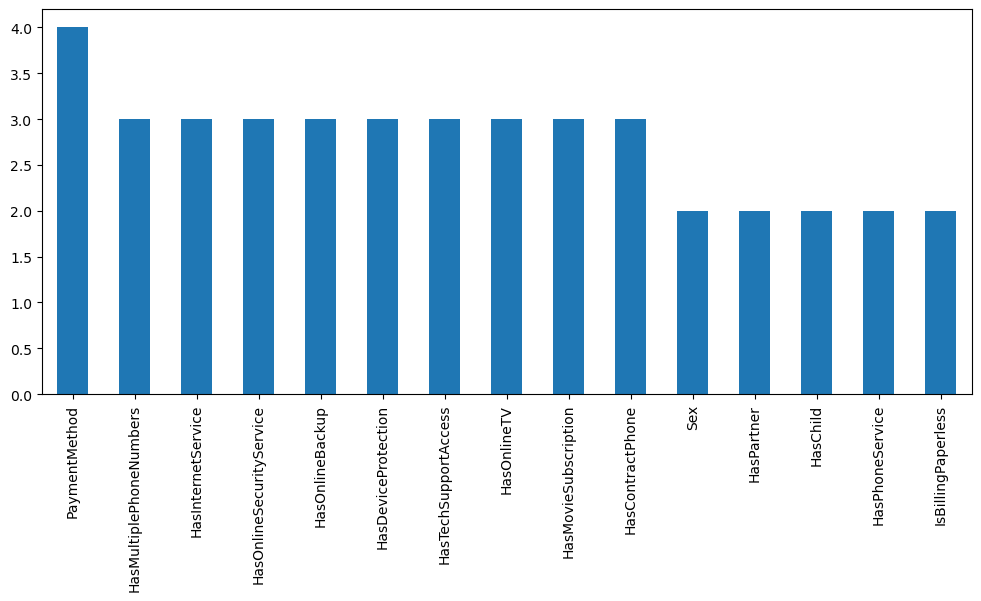

In [73]:
# we count unique categories with pandas unique() 
# and then plot them in descending order

data[cat_vars].nunique().sort_values(ascending=False).plot.bar(figsize=(12,5))

In [76]:
bianry_features = ['Sex', 'HasPartner', 'HasChild','HasPhoneService','IsBillingPaperless']
data[bianry_features].value_counts()

Sex     HasPartner  HasChild  HasPhoneService  IsBillingPaperless
Female  No          No        Yes              Yes                   703
Male    No          No        Yes              Yes                   626
                                               No                    445
Female  No          No        Yes              No                    415
Male    Yes         No        Yes              Yes                   396
Female  Yes         No        Yes              Yes                   365
                    Yes       Yes              Yes                   322
Male    Yes         Yes       Yes              Yes                   310
                                               No                    290
Female  Yes         Yes       Yes              No                    270
                    No        Yes              No                    196
Male    Yes         No        Yes              No                    175
        No          No        No               Yes        

In [74]:
cat_vars

['Sex',
 'HasPartner',
 'HasChild',
 'HasPhoneService',
 'HasMultiplePhoneNumbers',
 'HasInternetService',
 'HasOnlineSecurityService',
 'HasOnlineBackup',
 'HasDeviceProtection',
 'HasTechSupportAccess',
 'HasOnlineTV',
 'HasMovieSubscription',
 'HasContractPhone',
 'IsBillingPaperless',
 'PaymentMethod']

# Numerical variables

Let's go ahead and find out what numerical variables we have in the dataset

In [65]:
print('Number of numerical variables: ', len(num_vars))

# visualise the numerical variables
data[num_vars].head()

Number of numerical variables:  4


ClientPeriod  MonthlySpending TotalSpent  IsSeniorCitizen
0            55            19.50    1026.35                0
1            72            25.85     1872.2                0
2             1            75.90       75.9                0
3            32            79.30       2570                1
4            60           115.25    6758.45                0

## Discrete variables

Let's go ahead and find which variables are discrete, i.e., show a finite number of values

In [66]:
#  let's male a list of discrete variables
discrete_vars = [var for var in num_vars if len(
    data[var].unique()) < 20 ]


print('Number of discrete variables: ', len(discrete_vars))

Number of discrete variables:  1


In [67]:
# let's visualise the discrete variables

data[discrete_vars].head()

IsSeniorCitizen
0                0
1                0
2                0
3                1
4                0

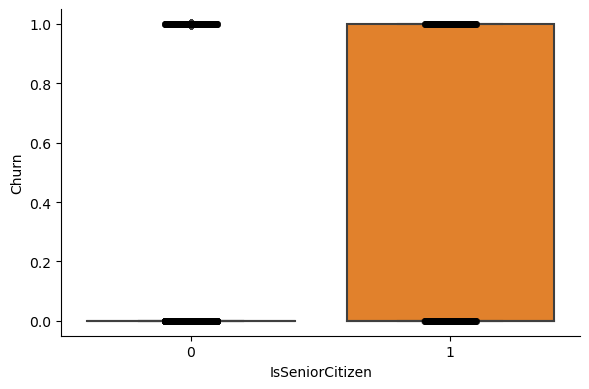

In [46]:
for var in discrete_vars:
    # make boxplot with Catplot
    sns.catplot(x=var, y='Churn', data=data, kind="box", height=4, aspect=1.5)
    # add data points to boxplot with stripplot
    sns.stripplot(x=var, y='Churn', data=data, jitter=0.1, alpha=0.3, color='k')
    plt.show()

## Continuous variables

Let's go ahead and find the distribution of the continuous variables. We will consider continuous variables to all those that are not temporal or discrete.

In [68]:
# make list of continuous variables
cont_vars = [
    var for var in num_vars if var not in discrete_vars]

print('Number of continuous variables: ', len(cont_vars))

Number of continuous variables:  3


In [69]:
cont_vars

['ClientPeriod', 'MonthlySpending', 'TotalSpent']

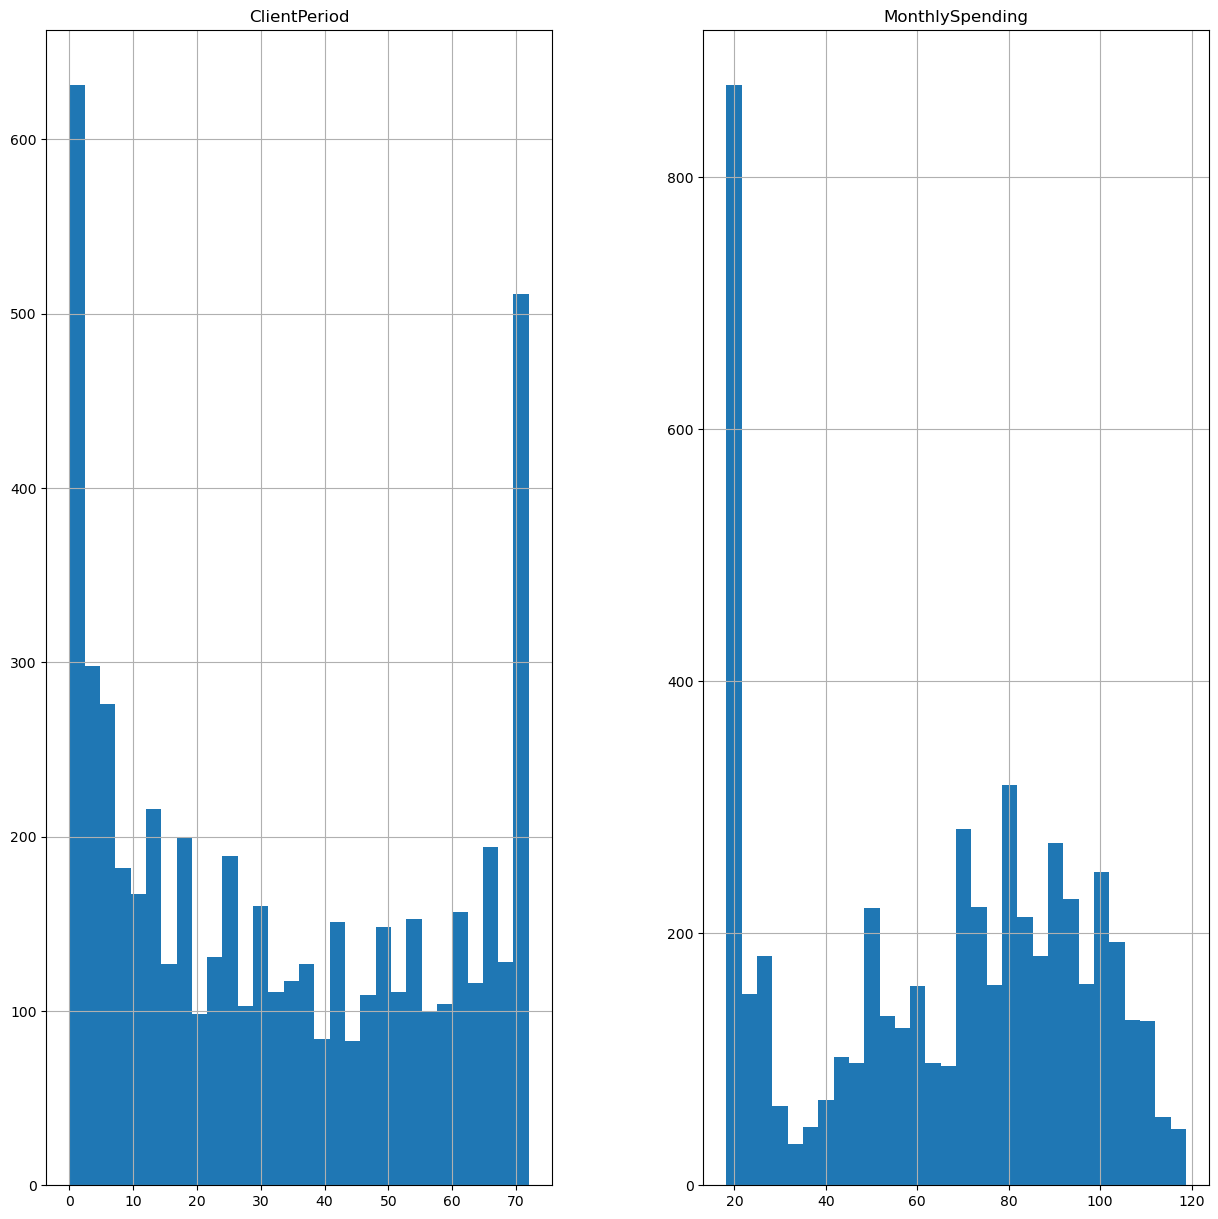

In [70]:
# lets plot histograms for all continuous variables

data[cont_vars].hist(bins=30, figsize=(15,15))
plt.show()